# Prospeção de Dados 2021/2022
## Third Home Assignment - Best Rules and Maximal Itemsets Identification
### Group 4
Students
- Catarina Canastra, nº57766
- Daniel Dias, nº59056
- João Raimundo, nº57454

### 0.1 - Import Libraries and Packages

In [1]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

import mlxtend.frequent_patterns
from mlxtend.frequent_patterns import fpgrowth, fpmax


from pyfim import pyeclat

# config plot
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)

### 0.2 - Load Dataset

In [2]:
def load_transactions (file_name, sep=","):
#input: csv file with one transaction per line,
#           where transactions may have a different number of items
#    output: matrix where each row is a vector of items (transaction)
#    author: Sara C. Madeira, Oct 2017
    lines = open(file_name, 'rt', encoding = "ISO-8859-1").readlines()
    transactions_matrix = []
    for l in lines:
        l = l.rstrip('\n')
        transaction = l.split(sep)
        transactions_matrix.append(transaction)
    return transactions_matrix

transactions=load_transactions("Online_Retail.txt", sep="\t")

In [3]:
transactions

[['CREAM CUPID HEARTS COAT HANGER',
  'GLASS STAR FROSTED T-LIGHT HOLDER',
  'KNITTED UNION FLAG HOT WATER BOTTLE',
  'RED WOOLLY HOTTIE WHITE HEART.',
  'SET 7 BABUSHKA NESTING BOXES',
  'WHITE HANGING HEART T-LIGHT HOLDER',
  'WHITE METAL LANTERN',
  'country:United Kingdom',
  'month:01'],
 ['HAND WARMER RED POLKA DOT',
  'HAND WARMER UNION JACK',
  'country:United Kingdom',
  'month:01'],
 ['ASSORTED COLOUR BIRD ORNAMENT',
  'BOX OF 6 ASSORTED COLOUR TEASPOONS',
  'BOX OF VINTAGE ALPHABET BLOCKS',
  'BOX OF VINTAGE JIGSAW BLOCKS',
  'DOORMAT NEW ENGLAND',
  'FELTCRAFT PRINCESS CHARLOTTE DOLL',
  'HOME BUILDING BLOCK WORD',
  'IVORY KNITTED MUG COSY',
  'LOVE BUILDING BLOCK WORD',
  "POPPY'S PLAYHOUSE BEDROOM",
  "POPPY'S PLAYHOUSE KITCHEN",
  'RECIPE BOX WITH METAL HEART',
  'country:United Kingdom',
  'month:01'],
 ['BLUE COAT RACK PARIS FASHION',
  'JAM MAKING SET WITH JARS',
  'RED COAT RACK PARIS FASHION',
  'YELLOW COAT RACK PARIS FASHION',
  'country:United Kingdom',
  'month

In [4]:
# Check the number of transactions
len(transactions)

24388

### 0.3 - Data Preparation/Preprocessing

#### List of sets

Creating a list of sets from the dataset allows us to easily find elements since it is not necessary to go through the entire dataset, just ask small questions. So, we can know for each element that we are looking for in how many transactions it is found.

In [4]:
tr_sets=[set(tr) for tr in transactions]

#### Prevalent columns-value pairs

As several pairs columns-value are very prevalent we are going to slighlty edit it so that more relevant results are displayed. Accordingly we are going to remove each occurrence of `country:United Kingdom` from the data set.

In [5]:
transactions_f=[]
filters=frozenset(['country:United Kingdom'])
for tr in transactions:
    ft=[i for i in tr if i not in filters and i.find("edu_num=")<0]
    transactions_f.append(ft)

#### Binary database

In [6]:
# Compute binary database (transactions X products )
tr_enc = TransactionEncoder()
trans_array = tr_enc.fit(transactions_f).transform(transactions_f)
binary_database = pd.DataFrame(trans_array, columns=tr_enc.columns_)
binary_database

"ACRYLIC HANGING JEWEL,BLUE"  "ACRYLIC HANGING JEWEL,PINK"  "ACRYLIC JEWEL ANGEL,PINK"  "ACRYLIC JEWEL ICICLE, BLUE"  "ACRYLIC JEWEL ICICLE, PINK"  "ACRYLIC JEWEL SNOWFLAKE, PINK"  "ACRYLIC JEWEL SNOWFLAKE,PINK"  "AIRLINE LOUNGE,METAL SIGN"  "ART LIGHTS,FUNK MONKEY"  "ASSORTED FLOWER COLOUR ""LEIS"""  "BATHROOM SCALES, TROPICAL BEACH"  "BIRTHDAY CARD, RETRO SPOT"  "BLACK TEA,COFFEE,SUGAR JARS"  "BREAD BIN, DINER STYLE, IVORY"  "BREAD BIN, DINER STYLE, MINT"  "BUNTING , SPOTTY "  "CAKESTAND, 3 TIER, LOVEHEART"  "CHARLIE+LOLA""EXTREMELY BUSY"" SIGN"  "CHRISTMAS GARLAND STARS,TREES"  "DECORATION , WOBBLY CHICKEN, METAL "  "DECORATION , WOBBLY RABBIT , METAL "  "DECORATION HEN ON NEST, HANGING"  "DECOUPAGE,GREETING CARD,"  "DIAMANTE HEART SHAPED WALL MIRROR, "  "ELEPHANT, BIRTHDAY CARD, "  "FANCY FONT BIRTHDAY CARD, "  "FEATHER PEN,COAL BLACK"  "FEATHER PEN,HOT PINK"  "FEATHER PEN,LIGHT PINK"  "FLOWER FAIRY,5 SUMMER B'DRAW LINERS"  "FLOWER GLASS GARLAND NECKL.36""BLACK"  "FLOWER GLASS GARLAND NECKL.36""BLUE"  "FLOWER GLASS GARLAND NECKL.36""GREEN"  "FLOWER GLASS GARLD NECKL36""AMETHYST"  "FLOWER GLASS GARLD NECKL36""TURQUOIS"  "FOLK ART GREETING CARD,pack/12"  "FOOD COVER WITH BEADS , SET 2 SIZES"  "GARLAND, MAGIC GARDEN 1.8M"  "GARLAND, VINTAGE BELLS"  "GREETING CARD, OVERCROWDED POOL."  "GREETING CARD, STICKY GORDON"  "GREETING CARD, TWO SISTERS."  "GREETING CARD,SQUARE, DOUGHNUTS"  "HOOK, 1 HANGER ,MAGIC GARDEN"  "KEY FOB , BACK DOOR "  "KEY FOB , FRONT  DOOR "  "KEY FOB , GARAGE DESIGN"  "KEY FOB , SHED"  "LARGE CAKE TOWEL, CHOCOLATE SPOTS"  "LETTER ""A"" BLING KEY RING"  "LETTER ""B"" BLING KEY RING"  "LETTER ""C"" BLING KEY RING"  "LETTER ""D"" BLING KEY RING"  "LETTER ""E"" BLING KEY RING"  "LETTER ""F"" BLING KEY RING"  "LETTER ""G"" BLING KEY RING"  "LETTER ""H"" BLING KEY RING"  "LETTER ""I"" BLING KEY RING"  "LETTER ""J"" BLING KEY RING"  "LETTER ""K"" BLING KEY RING"  "LETTER ""L"" BLING KEY RING"  "LETTER ""M"" BLING KEY RING"  "LETTER ""N"" BLING KEY RING"  "LETTER ""O"" BLING KEY RING"  "LETTER ""P"" BLING KEY RING"  "LETTER ""R"" BLING KEY RING"  "LETTER ""S"" BLING KEY RING"  "LETTER ""T"" BLING KEY RING"  "LETTER ""U"" BLING KEY RING"  "LETTER ""V"" BLING KEY RING"  "LETTER ""W"" BLING KEY RING"  "LETTER ""Y"" BLING KEY RING"  "LETTER ""Z"" BLING KEY RING"  "MERCHANT CHANDLER CREDIT ERROR, STO"  "METAL SIGN,CUPCAKE SINGLE HOOK"  "MUG , DOTCOMGIFTSHOP.COM "  "NURSERY A,B,C PAINTED LETTERS"  "PAPER CRAFT , LITTLE BIRDIE"  "PEARL & SHELL 42""NECKL. GREEN"  "PEARL & SHELL 42""NECKL. IVORY"  "PET MUG, GOLDFISH"  "PINK/WHITE ""KEEP CLEAN"" BULLET BIN"  "POCKET MIRROR ""GLAMOROUS"""  "RECORD FRAME 7"" SINGLE SIZE "  "RETRO ""TEA FOR ONE"" "  "RETRO PILL BOX , REVOLUTIONARY"  "RETRO PILL BOX KEY CHAIN,THE KING"  "RETRO TIN ASHTRAY,REVOLUTIONARY"  "RUBY GLASS NECKLACE 42"""  "RUSTIC WOODEN CABINET, GLASS DOORS"  "S/4 ICON COASTER,ELVIS LIVES"  "SET 3 RETROSPOT TEA,COFFEE,SUGAR"  "SILICON CUBE 25W, BLUE"  "SMALL POP BOX,FUNKY MONKEY"  "STRING OF 8 BUTTERFLIES,PINK"  "SWISS ROLL TOWEL, CHOCOLATE  SPOTS"  "SWISS ROLL TOWEL, PINK  SPOTS"  "TRAY, BREAKFAST IN BED"  "TUMBLER, BAROQUE"  "TUMBLER, NEW ENGLAND"  "Unsaleable, destroyed."  "WALL ART , LOVES' SECRET "  "WALL ART , THE MAGIC FOREST "  "WALL ART ,PUDDINGS "  "WALL ART,ONLY ONE PERSON "  "WHITE TEA,COFFEE,SUGAR JARS"  "WRAP, BILLBOARD FONTS DESIGN"  "WRAP, CAROUSEL"  "mouldy, thrown away."  "mouldy, unsaleable."  *Boombox Ipod Classic  *USB Office Mirror Ball  10 COLOUR SPACEBOY PEN  12 COLOURED PARTY BALLOONS  12 DAISY PEGS IN WOOD BOX  12 EGG HOUSE PAINTED WOOD  12 HANGING EGGS HAND PAINTED  12 IVORY ROSE PEG PLACE SETTINGS  12 MESSAGE CARDS WITH ENVELOPES  12 PENCIL SMALL TUBE WOODLAND  12 PENCILS SMALL TUBE RED RETROSPOT  12 PENCILS SMALL TUBE SKULL  12 PENCILS TALL TUBE POSY  12 PENCILS TALL TUBE RED RETROSPOT  12 PENCILS TALL TUBE SKULLS  12 PENCILS TALL TUBE WOODLAND  12 PINK HEN+CHICKS IN BASKET  12 PINK ROSE PEG PLACE SETTINGS  12 RED ROSE PEG PLACE SETTINGS  1

## 1. Objective 1 - Identify the most relevant Rules (max: 10)

1. Minimum support is applied to find all frequent itemsets (minimum support itemsets) in a data set.
2. These frequent itemsets and the minimum confidence constraint are used to compose the rules.

### 1.1. Performance evaluation

In [152]:
D={"minimum-support": [0.09,0.08,0.07,0.06,0.05,0.04,0.03,0.02,0.01], 
   "num_itemsets":[],
   "FP-growth-time":[],
   "ECLAT":[]}

for min_supp in D["minimum-support"]:
    t0 = time.time()

    FI_fpg= fpgrowth(binary_database, min_supp)
    t1 = time.time()
    D["num_itemsets"].append(FI_fpg.shape[0])
    D["FP-growth-time"].append(t1-t0)

    FI_eclat= pyeclat(transactions_f, min_supp)    
    t2 = time.time()
    D["ECLAT"].append(t2-t1)

df_performance=pd.DataFrame(D)
df_performance

minimum-support  num_itemsets  FP-growth-time     ECLAT
0             0.09             1        0.359999  0.460018
1             0.08             3        0.347984  0.825999
2             0.07             3        0.304998  0.437017
3             0.06             6        0.307000  0.599000
4             0.05            13        0.315988  0.642013
5             0.04            42        0.497987  0.669013
6             0.03           108        1.230000  0.664986
7             0.02           272        2.601013  1.709985
8             0.01          1214        6.777020  3.780997

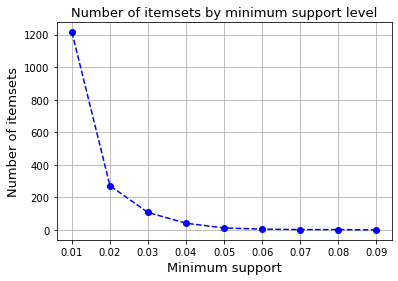

In [153]:
# simple direct plot
plt.plot(D["minimum-support"], D["num_itemsets"], '--bo')
plt.title('Number of itemsets by minimum support level', fontsize=13)
plt.xlabel('Minimum support', fontsize=13)
plt.ylabel('Number of itemsets', fontsize=13)
plt.grid()
plt.show()

### 1.2. Finding frequent itemsets and the respective rules

In order to have 10 item sets with lenght >=2, we choose a minimum support value of 0.02.

In [7]:
FI_eclat= pyeclat(transactions_f, 0.02)
FI_eclat['length'] = FI_eclat['itemsets'].apply(lambda x: len(x))
FI_eclat.sort_values(by=['support'], ascending=False)

support                                                 itemsets  length
271  0.094391                    (WHITE HANGING HEART T-LIGHT HOLDER,)       1
270  0.088937                              (REGENCY CAKESTAND 3 TIER,)       1
269  0.087543                               (JUMBO BAG RED RETROSPOT,)       1
268  0.069952                                         (PARTY BUNTING,)       1
267  0.065893                               (LUNCH BAG RED RETROSPOT,)       1
..        ...                                                      ...     ...
219  0.020092        (LUNCH BAG APPLE DESIGN, LUNCH BAG RED RETROSPOT)       2
128  0.020092  (STRAWBERRY CHARLOTTE BAG, RED RETROSPOT CHARLOTTE BAG)       2
1    0.020051                        (PANTRY MAGNETIC  SHOPPING LIST,)       1
2    0.020051                    (SET/3 RED GINGHAM ROSE STORAGE BOX,)       1
0    0.020051                            (FELTCRAFT BUTTERFLY HEARTS,)       1

[272 rows x 3 columns]

In [8]:
# infering itemsets with length >= 2
FI_eclat[(FI_eclat['length'] >= 2)].sort_values(by=['support'], ascending=False).head(10)


support                                                            itemsets  length
257  0.034156                  (JUMBO BAG PINK POLKADOT, JUMBO BAG RED RETROSPOT)       2
224  0.032147  (GREEN REGENCY TEACUP AND SAUCER, ROSES REGENCY TEACUP AND SAUCER)       2
253  0.030056                   (JUMBO STORAGE BAG SUKI, JUMBO BAG RED RETROSPOT)       2
250  0.028006        (JUMBO SHOPPER VINTAGE RED PAISLEY, JUMBO BAG RED RETROSPOT)       2
261  0.026570                  (LUNCH BAG  BLACK SKULL., LUNCH BAG RED RETROSPOT)       2
212  0.026488              (ALARM CLOCK BAKELIKE GREEN, ALARM CLOCK BAKELIKE RED)       2
154  0.026406   (PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY TEACUP AND SAUCER)       2
153  0.025176   (PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY TEACUP AND SAUCER)       2
234  0.025135                  (LUNCH BAG PINK POLKADOT, LUNCH BAG RED RETROSPOT)       2
202  0.024315           (JUMBO  BAG BAROQUE BLACK WHITE, JUMBO BAG RED RETROSPOT)       2

In [39]:
# identifying the top 10 rules by confidence
all_rules = association_rules(FI_eclat, metric="confidence", min_threshold=0.65)
all_rules.sort_values(by=['confidence'], ascending=False).head(10)

antecedents                                                         consequents  antecedent support  consequent support   support  confidence       lift  leverage  conviction
6    (PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY TEACUP AND SAUCER)                                   (GREEN REGENCY TEACUP AND SAUCER)            0.025176            0.043341  0.022511    0.894137  20.630282  0.021420    9.036748
4    (GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY TEACUP AND SAUCER)                                   (ROSES REGENCY TEACUP AND SAUCER)            0.026406            0.045924  0.022511    0.852484  18.562849  0.021298    6.467629
9                                     (PINK REGENCY TEACUP AND SAUCER)                                   (GREEN REGENCY TEACUP AND SAUCER)            0.032844            0.043341  0.026406    0.803995  18.550454  0.024983    4.880789
8                                     (PINK REGENCY TEACUP AND SAUCER)                                   (ROSES REGENCY TEACUP AND SAUCER)            0.032844            0.045924  0.025176    0.766542  16.691448  0.023668    4.086710
12                                   (GREEN REGENCY TEACUP AND SAUCER)                                   (ROSES REGENCY TEACUP AND SAUCER)            0.043341            0.045924  0.032147    0.741722  16.150993  0.030157    3.693986
3                                  (GARDENERS KNEELING PAD CUP OF TEA)                                  (GARDENERS KNEELING PAD KEEP CALM)            0.031368            0.037887  0.022511    0.717647  18.941533  0.021323    3.407482
5   (GREEN REGENCY TEACUP AND SAUCER, ROSES REGENCY TEACUP AND SAUCER)                                    (PINK REGENCY TEACUP AND SAUCER)            0.032147            0.032844  0.022511    0.700255  21.320626  0.021455    3.226597
13                                   (ROSES REGENCY TEACUP AND SAUCER)                                   (GREEN REGENCY TEACUP AND SAUCER)            0.045924            0.043341  0.032147    0.700000  16.150993  0.030157    3.188863
2                                        (CHARLOTTE BAG PINK POLKADOT)                                       (RED RETROSPOT CHARLOTTE BAG)            0.031163            0.043054  0.021568    0.692105  16.075298  0.020226    3.108030
7                                     (PINK REGENCY TEACUP AND SAUCER)  (GREEN REGENCY TEACUP AND SAUCER, ROSES REGENCY TEACUP AND SAUCER)            0.032844            0.032147  0.022511    0.685393  21.320626  0.021455    3.076390

## 2. Objective 2 - Identify the most relevant Maximal itemsets (max: 10)
1. Identify the Maximal Itemsets
2. Identify rules from the maximal itemsets and discuss them

In [57]:
fpmax_df=fpmax(binary_database, min_support=0.02, use_colnames=True)
fpmax_df['length'] = fpmax_df['itemsets'].apply(lambda x: len(x))
fpmax_df.sort_values(by=['length'], ascending=False).head(20)

support                                                                                            itemsets  length
148  0.022511  (PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY TEACUP AND SAUCER, ROSES REGENCY TEACUP AND SAUCER)       3
172  0.021404                                           (JUMBO BAG PINK VINTAGE PAISLEY, JUMBO BAG RED RETROSPOT)       2
197  0.020092                                                   (LUNCH BAG APPLE DESIGN, LUNCH BAG RED RETROSPOT)       2
205  0.022429                                                  (LUNCH BAG PINK POLKADOT, LUNCH BAG  BLACK SKULL.)       2
140  0.022511                               (GARDENERS KNEELING PAD CUP OF TEA, GARDENERS KNEELING PAD KEEP CALM)       2
203  0.023126                                                    (LUNCH BAG RED RETROSPOT, LUNCH BAG SUKI DESIGN)       2
202  0.021240                                                    (LUNCH BAG  BLACK SKULL., LUNCH BAG SUKI DESIGN)       2
169  0.022060                                               (JUMBO BAG RED RETROSPOT, JUMBO BAG WOODLAND ANIMALS)       2
199  0.021240                                         (REGENCY CAKESTAND 3 TIER, GREEN REGENCY TEACUP AND SAUCER)       2
128  0.020092                                             (RED RETROSPOT CHARLOTTE BAG, STRAWBERRY CHARLOTTE BAG)       2
196  0.021814                                                       (LUNCH BAG RED RETROSPOT, LUNCH BAG WOODLAND)       2
207  0.022019                                         (REGENCY CAKESTAND 3 TIER, ROSES REGENCY TEACUP AND SAUCER)       2
157  0.022347                                                     (JUMBO BAG STRAWBERRY, JUMBO BAG RED RETROSPOT)       2
192  0.026488                                              (ALARM CLOCK BAKELIKE RED, ALARM CLOCK BAKELIKE GREEN)       2
191  0.022757                                                         (JUMBO BAG RED RETROSPOT, JUMBO BAG APPLES)       2
189  0.022347                                     (WOODEN FRAME ANTIQUE WHITE, WOODEN PICTURE FRAME WHITE FINISH)       2
175  0.020912                                            (RED RETROSPOT CHARLOTTE BAG, CHARLOTTE BAG SUKI DESIGN)       2
185  0.024315                                           (JUMBO BAG RED RETROSPOT, JUMBO  BAG BAROQUE BLACK WHITE)       2
184  0.020256                                                      (HEART OF WICKER LARGE, HEART OF WICKER SMALL)       2
136  0.020502                              (RED HANGING HEART T-LIGHT HOLDER, WHITE HANGING HEART T-LIGHT HOLDER)       2

We defined a function to analyse the frequent itemsets considered for rule generation and remove those whose union of antecendents and consequents itemsets were not considered maximal itemsets.

In [38]:
def remove_non_maximal_rules(rules_df, maximal_itemsets_df):
    to_remove = []
    for rules_idx, rule_row in rules_df.iterrows():
        rule_ant = rule_row['antecedents']
        rule_cons = rule_row['consequents']
        temp_set = frozenset().union(*[rule_ant, rule_cons])
        # boolean to check if the set containing antecedents and consequents is actually a maximal itemset
        # We'll compare this tempSet to all maximalSets, and if none match (meaning it is not maximal) we'll remove the rule
        is_maximal = False
        for max_idx, max_itemset_row in maximal_itemsets_df.iterrows():
            max_itemset = max_itemset_row["itemsets"]
            is_maximal = is_maximal or temp_set == max_itemset
        if not is_maximal:
            to_remove.append(rules_idx)
    return rules_df.drop(index=to_remove)

In [60]:
# identifying the top 10 maximal itemsets rules by confidence
rules_max = remove_non_maximal_rules(all_rules, fpmax_df)
rules_max.sort_values(by=['confidence'], ascending=False).head(10)

antecedents                                                         consequents  antecedent support  consequent support   support  confidence       lift  leverage  conviction
6    (PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY TEACUP AND SAUCER)                                   (GREEN REGENCY TEACUP AND SAUCER)            0.025176            0.043341  0.022511    0.894137  20.630282  0.021420    9.036748
4    (GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY TEACUP AND SAUCER)                                   (ROSES REGENCY TEACUP AND SAUCER)            0.026406            0.045924  0.022511    0.852484  18.562849  0.021298    6.467629
3                                  (GARDENERS KNEELING PAD CUP OF TEA)                                  (GARDENERS KNEELING PAD KEEP CALM)            0.031368            0.037887  0.022511    0.717647  18.941533  0.021323    3.407482
5   (GREEN REGENCY TEACUP AND SAUCER, ROSES REGENCY TEACUP AND SAUCER)                                    (PINK REGENCY TEACUP AND SAUCER)            0.032147            0.032844  0.022511    0.700255  21.320626  0.021455    3.226597
2                                        (CHARLOTTE BAG PINK POLKADOT)                                       (RED RETROSPOT CHARLOTTE BAG)            0.031163            0.043054  0.021568    0.692105  16.075298  0.020226    3.108030
7                                     (PINK REGENCY TEACUP AND SAUCER)  (GREEN REGENCY TEACUP AND SAUCER, ROSES REGENCY TEACUP AND SAUCER)            0.032844            0.032147  0.022511    0.685393  21.320626  0.021455    3.076390
14                                           (JUMBO BAG PINK POLKADOT)                                           (JUMBO BAG RED RETROSPOT)            0.050476            0.087543  0.034156    0.676686   7.729747  0.029737    2.822197
0                                           (STRAWBERRY CHARLOTTE BAG)                                       (RED RETROSPOT CHARLOTTE BAG)            0.030097            0.043054  0.020092    0.667575  15.505540  0.018796    2.878682
10                                 (PAPER CHAIN KIT VINTAGE CHRISTMAS)                                    (PAPER CHAIN KIT 50'S CHRISTMAS)            0.034115            0.047974  0.022757    0.667067  13.904647  0.021120    2.859514
1                                   (RED HANGING HEART T-LIGHT HOLDER)                                (WHITE HANGING HEART T-LIGHT HOLDER)            0.030917            0.094391  0.020502    0.663130   7.025375  0.017584    2.688305